In [1]:
# we load the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action="ignore", category=RuntimeWarning)  # ignore all UserWarnings
warnings.simplefilter(action="ignore", category=FutureWarning)  # ignore all FutureWarninga

import sys
sys.path.append('functions') # add the path to the user functions directory

In each case, assume that:

* We ALWAYS exit positions 20 minutes before the end of the session (at 3:40 PM)
* We NEVER enter positions in the first 15 minutes of the session (until 9:45 AM)

# Exercise 5.1

* Load the data saved in Exercise 4.5
* Calculate the position and gross and net PNL for a strategy based on a single moving average (SMA or EMA) for the parameters selected in Exercise 4.2
* Plot the results (cumulative PNL) on a chart
* Display the strategy's activity for two selected days

In [4]:

dataUSA_KO_PEP = pd.read_parquet('dataUSA_KO_PEP_after_HW5.parquet')

dataUSA_KO_PEP.head(20)

,close_KO,close_PEP,close_KO_SMA20,close_KO_EMA20,close_KO_Median20,close_KO_Median40,close_KO_MedAD60,close_KO_MedAD20
timestamp,,,,,,,,
2025-01-02 09:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:32:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:33:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:34:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:38:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:39:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cond1_mom_long = dataUSA_KO_PEP['close_KO'].shift(1) > dataUSA_KO_PEP['close_KO_SMA20'].shift(1)


In [7]:
lagprice_nonmiss = dataUSA_KO_PEP['close_KO'].shift(1).notna()
lagsma_nonmiss = dataUSA_KO_PEP['close_KO_SMA20'].shift(1).notna()

dataUSA_KO_PEP['position1_mom'] = np.where(
        lagprice_nonmiss & lagsma_nonmiss,
        np.where(cond1_mom_long, 1, -1),
        np.nan)


In [8]:
dataUSA_KO_PEP.loc[
    dataUSA_KO_PEP.between_time("09:30", "09:45").index,
    ['position1_mom']
] = 0

dataUSA_KO_PEP.loc[
    dataUSA_KO_PEP.between_time("15:41", "16:00").index,
    ['position1_mom']
] = 0

In [ ]:
# Gross PNL
dataUSA_KO_PEP['pnl_gross1_mom'] = (
    dataUSA_KO_PEP['close_KO'].diff() * 
    dataUSA_KO_PEP['position1_mom'])

dataUSA_KO_PEP['pnl_gross1_mom'] = dataUSA_KO_PEP['pnl_gross1_mom'].fillna(0)

In [10]:
# Net PNL
dataUSA_KO_PEP['ntrans1'] = dataUSA_KO_PEP['position1_mom'].diff().abs()

In [11]:
dataUSA_KO_PEP['pnl_net1_mom'] = (
    dataUSA_KO_PEP['pnl_gross1_mom'] -
    1.5 * dataUSA_KO_PEP['ntrans1'])

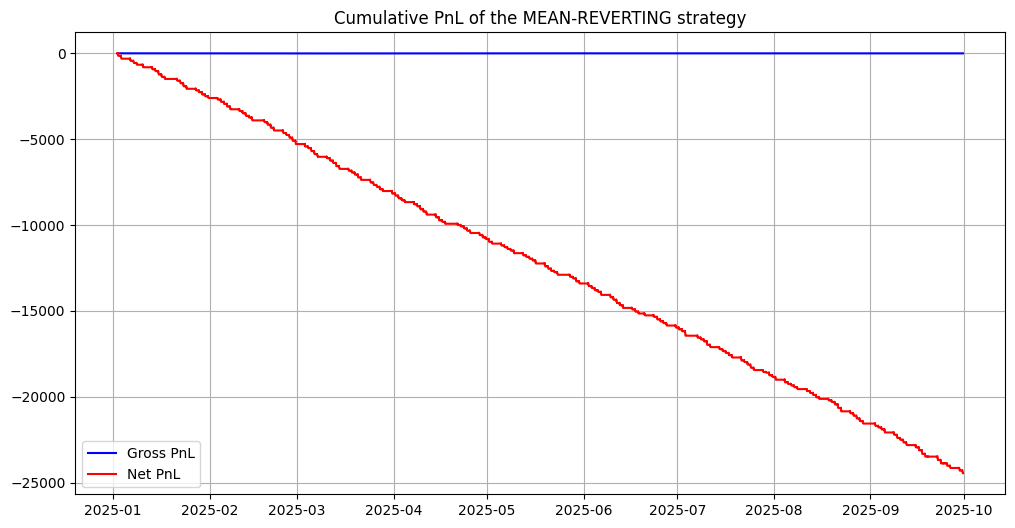

In [14]:
dataUSA_KO_PEP_plot = dataUSA_KO_PEP.copy()

plt.figure(figsize=(12, 6))
plt.plot(
    dataUSA_KO_PEP_plot.index, 
    np.cumsum(dataUSA_KO_PEP['pnl_gross1_mom']), 
    color='blue', label='Gross PnL')
plt.plot(
    dataUSA_KO_PEP_plot.index, 
    np.cumsum(dataUSA_KO_PEP['pnl_net1_mom']), 
    color='red', label='Net PnL')
plt.title("Cumulative PnL of the MEAN-REVERTING strategy")
plt.legend()
plt.grid()


In [19]:
# Select two specific dates
selected_dates = ['2025-03-28', '2025-03-12']  

# Display strategy activity for these two days
for date in selected_dates:
    print(f"\nStrategy Activity - {date}")
    print("="*80)
    # Use .loc to filter by date
    day_data = dataUSA_KO_PEP.loc[date]
    
    # Display relevant columns
    display_cols = ['close_KO', 'close_KO_SMA20', 'position1_mom', 
                    'pnl_gross1_mom', 'ntrans1', 'pnl_net1_mom']
    print(day_data[display_cols])
    
    # Daily summary
    print(f"\nDaily Summary:")
    print(f"Total Transactions: {day_data['ntrans1'].sum()}")
    print(f"Total Gross PNL: {day_data['pnl_gross1_mom'].sum():.2f}")
    print(f"Total Net PNL: {day_data['pnl_net1_mom'].sum():.2f}")


Strategy Activity - 2025-03-28
                     close_KO  close_KO_SMA20  position1_mom  pnl_gross1_mom  \
timestamp                                                                      
2025-03-28 09:31:00       NaN             NaN            0.0             0.0   
2025-03-28 09:32:00       NaN             NaN            0.0             0.0   
2025-03-28 09:33:00       NaN             NaN            0.0             0.0   
2025-03-28 09:34:00       NaN             NaN            0.0             0.0   
2025-03-28 09:35:00       NaN             NaN            0.0             0.0   
...                       ...             ...            ...             ...   
2025-03-28 15:56:00       NaN             NaN            0.0             0.0   
2025-03-28 15:57:00       NaN             NaN            0.0             0.0   
2025-03-28 15:58:00       NaN             NaN            0.0             0.0   
2025-03-28 15:59:00       NaN             NaN            0.0             0.0   
2025-03-

# Exercise 5.2

* Calculate the position and gross and net PNL for a strategy based on two moving medians for the parameters selected in Exercise 4.3
* Plot the obtained results (cumulative PNL) on a graph
* Display the strategy's activity for two selected days

In [20]:
cond2_mom_long = dataUSA_KO_PEP['close_KO_Median20'].shift(1) > dataUSA_KO_PEP['close_KO_Median40'].shift(1)

lagsemedian20_nonmiss = dataUSA_KO_PEP['close_KO_Median20'].shift(1).notna()
lagsemedian40_nonmiss = dataUSA_KO_PEP['close_KO_Median40'].shift(1).notna()

dataUSA_KO_PEP['position2b_mom'] = np.where(
        lagsemedian20_nonmiss & lagsemedian40_nonmiss,
        np.where(cond2_mom_long, 1, -1),
        np.nan)


In [21]:
dataUSA_KO_PEP.loc[
    dataUSA_KO_PEP.between_time("09:30", "09:45").index,
    ['position2b_mom']
] = 0

dataUSA_KO_PEP.loc[
    dataUSA_KO_PEP.between_time("15:41", "16:00").index,
    ['position2b_mom']
] = 0


In [22]:
# Gross
dataUSA_KO_PEP['pnl_gross2b_mom'] = (
    dataUSA_KO_PEP['close_KO'].diff() * 
    dataUSA_KO_PEP['position2b_mom'])

# we replace missing values with 0
dataUSA_KO_PEP['pnl_gross2b_mom'] = dataUSA_KO_PEP['pnl_gross2b_mom'].fillna(0)

# number of transactions
dataUSA_KO_PEP['ntrans2b'] = dataUSA_KO_PEP['position2b_mom'].diff().abs()

# Net PnL
dataUSA_KO_PEP['pnl_net2b_mom'] = (
    dataUSA_KO_PEP['pnl_gross2b_mom'] -
    1.5 * dataUSA_KO_PEP['ntrans2b'])

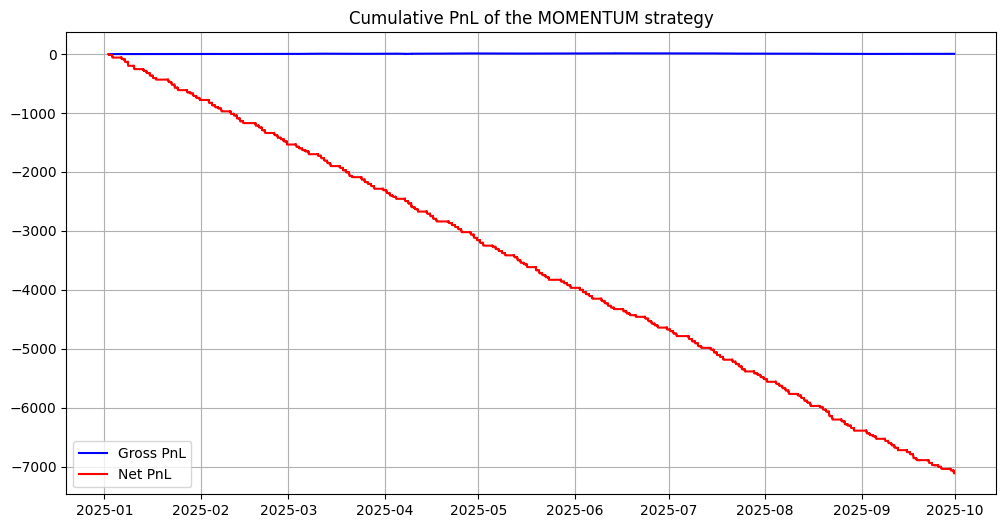

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(
    dataUSA_KO_PEP_plot.index, 
    np.cumsum(dataUSA_KO_PEP['pnl_gross2b_mom']), 
    color='blue', label='Gross PnL')
plt.plot(
    dataUSA_KO_PEP_plot.index, 
    np.cumsum(dataUSA_KO_PEP['pnl_net2b_mom']), 
    color='red', label='Net PnL')
plt.title("Cumulative PnL of the MOMENTUM strategy")
plt.legend()
plt.grid()

In [26]:
# Select two specific dates
selected_dates = ['2025-03-28', '2025-03-12']  

# Display strategy activity for these two days
for date in selected_dates:
    print(f"\nStrategy Activity - {date}")
    print("="*80)
    # Use .loc to filter by date
    day_data = dataUSA_KO_PEP.loc[date]
    
    # Display relevant columns
    display_cols = ['close_KO', 'close_KO_Median20', 'position2b_mom', 
                    'pnl_gross2b_mom', 'ntrans2b', 'pnl_net2b_mom']
    print(day_data[display_cols])
    
    # Daily summary
    print(f"\nDaily Summary:")
    print(f"Total Transactions: {day_data['ntrans2b'].sum()}")
    print(f"Total Gross PNL: {day_data['pnl_gross2b_mom'].sum():.2f}")
    print(f"Total Net PNL: {day_data['pnl_net2b_mom'].sum():.2f}")


Strategy Activity - 2025-03-28
                     close_KO  close_KO_Median20  position2b_mom  \
timestamp                                                          
2025-03-28 09:31:00       NaN                NaN             0.0   
2025-03-28 09:32:00       NaN                NaN             0.0   
2025-03-28 09:33:00       NaN                NaN             0.0   
2025-03-28 09:34:00       NaN                NaN             0.0   
2025-03-28 09:35:00       NaN                NaN             0.0   
...                       ...                ...             ...   
2025-03-28 15:56:00       NaN                NaN             0.0   
2025-03-28 15:57:00       NaN                NaN             0.0   
2025-03-28 15:58:00       NaN                NaN             0.0   
2025-03-28 15:59:00       NaN                NaN             0.0   
2025-03-28 16:00:00       NaN                NaN             0.0   

                     pnl_gross2b_mom  ntrans2b  pnl_net2b_mom  
timestamp          

# Exercise 5.3

* Calculate the position and gross and net PNL for a strategy based on the volatility breakout model for the parameters selected in Exercise 4.4
* Plot the obtained results (cumulative PNL) on a chart
* Display the strategy's activity for two selected days

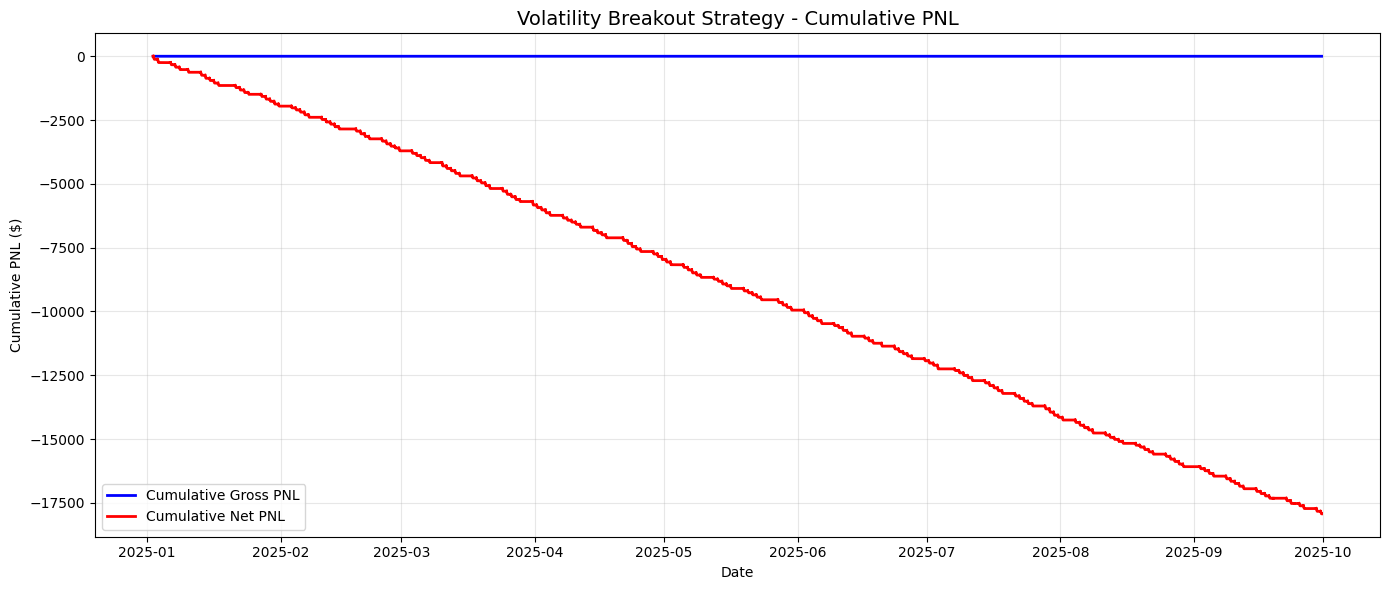

Sample of available dates:
[datetime.date(2025, 1, 2) datetime.date(2025, 1, 2)
 datetime.date(2025, 1, 2) datetime.date(2025, 1, 2)
 datetime.date(2025, 1, 2) datetime.date(2025, 1, 2)
 datetime.date(2025, 1, 2) datetime.date(2025, 1, 2)
 datetime.date(2025, 1, 2) datetime.date(2025, 1, 2)
 datetime.date(2025, 1, 2) datetime.date(2025, 1, 2)
 datetime.date(2025, 1, 2) datetime.date(2025, 1, 2)
 datetime.date(2025, 1, 2) datetime.date(2025, 1, 2)
 datetime.date(2025, 1, 2) datetime.date(2025, 1, 2)
 datetime.date(2025, 1, 2) datetime.date(2025, 1, 2)
 datetime.date(2025, 1, 2) datetime.date(2025, 1, 2)
 datetime.date(2025, 1, 2) datetime.date(2025, 1, 2)
 datetime.date(2025, 1, 2) datetime.date(2025, 1, 2)
 datetime.date(2025, 1, 2) datetime.date(2025, 1, 2)
 datetime.date(2025, 1, 2) datetime.date(2025, 1, 2)
 datetime.date(2025, 1, 2) datetime.date(2025, 1, 2)
 datetime.date(2025, 1, 2) datetime.date(2025, 1, 2)
 datetime.date(2025, 1, 2) datetime.date(2025, 1, 2)
 datetime.date(2025

In [ ]:
# 1. Calculate position based on volatility breakout model
# Define the breakout condition: price moves beyond median +/- k*MedAD
k = 2  

# Calculate upper and lower bands
dataUSA_KO_PEP['upper_band'] = (dataUSA_KO_PEP['close_KO_Median20'] + 
                                 k * dataUSA_KO_PEP['close_KO_MedAD20'])
dataUSA_KO_PEP['lower_band'] = (dataUSA_KO_PEP['close_KO_Median20'] - 
                                 k * dataUSA_KO_PEP['close_KO_MedAD20'])

# Define conditions for long/short positions
cond_vb_long = dataUSA_KO_PEP['close_KO'].shift(1) > dataUSA_KO_PEP['upper_band'].shift(1)
cond_vb_short = dataUSA_KO_PEP['close_KO'].shift(1) < dataUSA_KO_PEP['lower_band'].shift(1)

# Check for non-missing values
lagprice_nonmiss = dataUSA_KO_PEP['close_KO'].shift(1).notna()
lagbands_nonmiss = (dataUSA_KO_PEP['upper_band'].shift(1).notna() & 
                    dataUSA_KO_PEP['lower_band'].shift(1).notna())

# Calculate position: 1 (long), -1 (short), 0 (neutral)
dataUSA_KO_PEP['position_vb'] = np.where(
    lagprice_nonmiss & lagbands_nonmiss,
    np.where(cond_vb_long, 1, 
             np.where(cond_vb_short, -1, 0)),
    np.nan
)

# Set position to 0 during first 15 minutes (09:30-09:45)
dataUSA_KO_PEP.loc[
    dataUSA_KO_PEP.between_time("09:30", "09:45").index,
    ['position_vb']
] = 0

# Set position to 0 during last 20 minutes (15:41-16:00)
dataUSA_KO_PEP.loc[
    dataUSA_KO_PEP.between_time("15:41", "16:00").index,
    ['position_vb']
] = 0

# 2. Calculate Gross PNL
dataUSA_KO_PEP['pnl_gross_vb'] = (
    dataUSA_KO_PEP['close_KO'].diff() * 
    dataUSA_KO_PEP['position_vb']
)
dataUSA_KO_PEP['pnl_gross_vb'] = dataUSA_KO_PEP['pnl_gross_vb'].fillna(0)

# 3. Calculate number of transactions and Net PNL
dataUSA_KO_PEP['ntrans_vb'] = dataUSA_KO_PEP['position_vb'].diff().abs()
dataUSA_KO_PEP['pnl_net_vb'] = (
    dataUSA_KO_PEP['pnl_gross_vb'] -
    1.5 * dataUSA_KO_PEP['ntrans_vb']
)

# 4. Calculate cumulative PNL
dataUSA_KO_PEP['cum_pnl_gross_vb'] = dataUSA_KO_PEP['pnl_gross_vb'].cumsum()
dataUSA_KO_PEP['cum_pnl_net_vb'] = dataUSA_KO_PEP['pnl_net_vb'].cumsum()

# 5. Plot cumulative PNL
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(dataUSA_KO_PEP.index, dataUSA_KO_PEP['cum_pnl_gross_vb'], 
        label='Cumulative Gross PNL', color='blue', linewidth=2)
ax.plot(dataUSA_KO_PEP.index, dataUSA_KO_PEP['cum_pnl_net_vb'], 
        label='Cumulative Net PNL', color='red', linewidth=2)
ax.set_title('Volatility Breakout Strategy - Cumulative PNL', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative PNL ($)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Display strategy activity for two selected days
# First, check available dates
print("Sample of available dates:")
print(dataUSA_KO_PEP.index.date[:50])

# Select two dates (modify based on your data)
selected_dates = ['2025-01-02', '2025-01-03']

for date in selected_dates:
    print(f"\n{'='*80}")
    print(f"Strategy Activity - {date}")
    print('='*80)
    
    # Filter data for the specific date
    day_data = dataUSA_KO_PEP.loc[date]
    
    # Display relevant columns
    display_cols = ['close_KO', 'close_KO_Median20', 'close_KO_MedAD20', 
                    'upper_band', 'lower_band', 'position_vb', 
                    'pnl_gross_vb', 'ntrans_vb', 'pnl_net_vb']
    print(day_data[display_cols])
    
    # Daily summary
    print(f"\n{'='*80}")
    print(f"Daily Summary for {date}:")
    print(f"Total Transactions: {day_data['ntrans_vb'].sum():.0f}")
    print(f"Total Gross PNL: ${day_data['pnl_gross_vb'].sum():.4f}")
    print(f"Total Net PNL: ${day_data['pnl_net_vb'].sum():.4f}")
    print(f"Transaction Costs: ${(1.5 * day_data['ntrans_vb'].sum()):.4f}")


# Exercise 5.4 (***)

* Calculate the position and gross and net PNL for a strategy based on the volatility breakout model with different entry and exit thresholds (DOUBLE volatility breakout) and a selected volatility measure (see the position calculation formulas on the slides).
* Plot the obtained results (cumulative PNL) on a chart.
* Display the strategy's activity for two selected days.

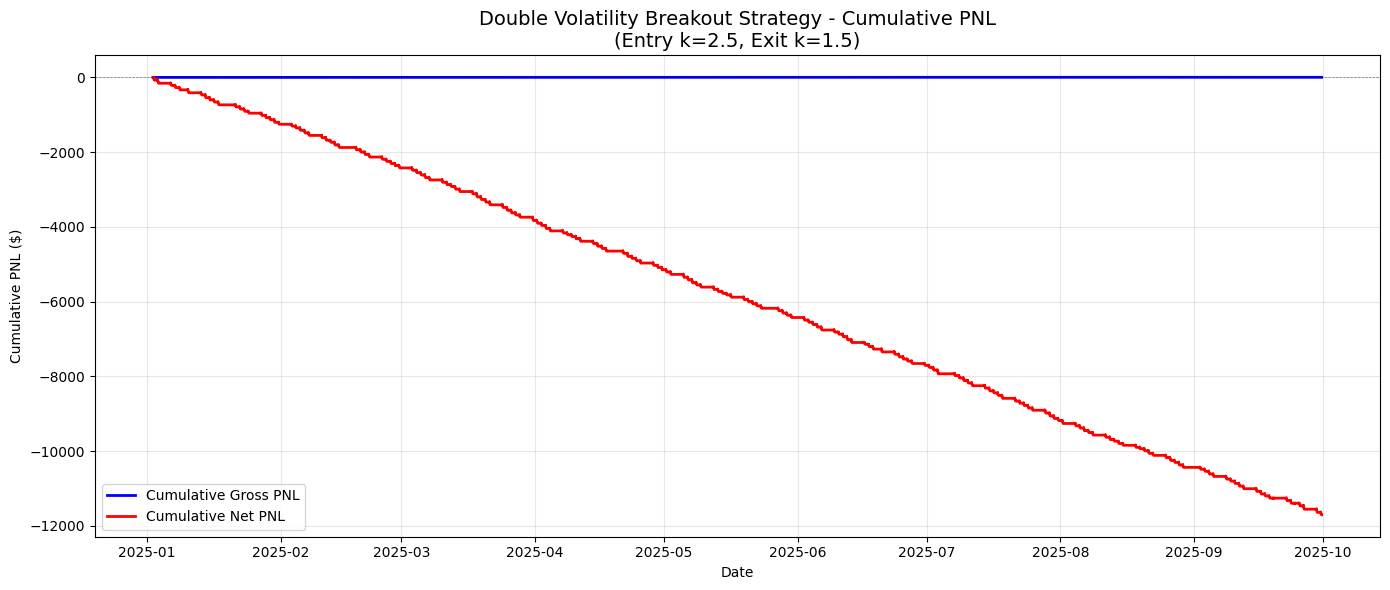

Sample of available dates:
[datetime.date(2025, 1, 2) datetime.date(2025, 1, 3)
 datetime.date(2025, 1, 6) datetime.date(2025, 1, 7)
 datetime.date(2025, 1, 8) datetime.date(2025, 1, 10)
 datetime.date(2025, 1, 13) datetime.date(2025, 1, 14)
 datetime.date(2025, 1, 15) datetime.date(2025, 1, 16)]

Strategy Activity - 2025-01-10
                     close_KO  close_KO_Median20  close_KO_MedAD20  \
timestamp                                                            
2025-01-10 09:31:00       NaN                NaN               NaN   
2025-01-10 09:32:00       NaN                NaN               NaN   
2025-01-10 09:33:00       NaN                NaN               NaN   
2025-01-10 09:34:00       NaN                NaN               NaN   
2025-01-10 09:35:00       NaN                NaN               NaN   
2025-01-10 09:36:00       NaN                NaN               NaN   
2025-01-10 09:37:00       NaN                NaN               NaN   
2025-01-10 09:38:00       NaN           

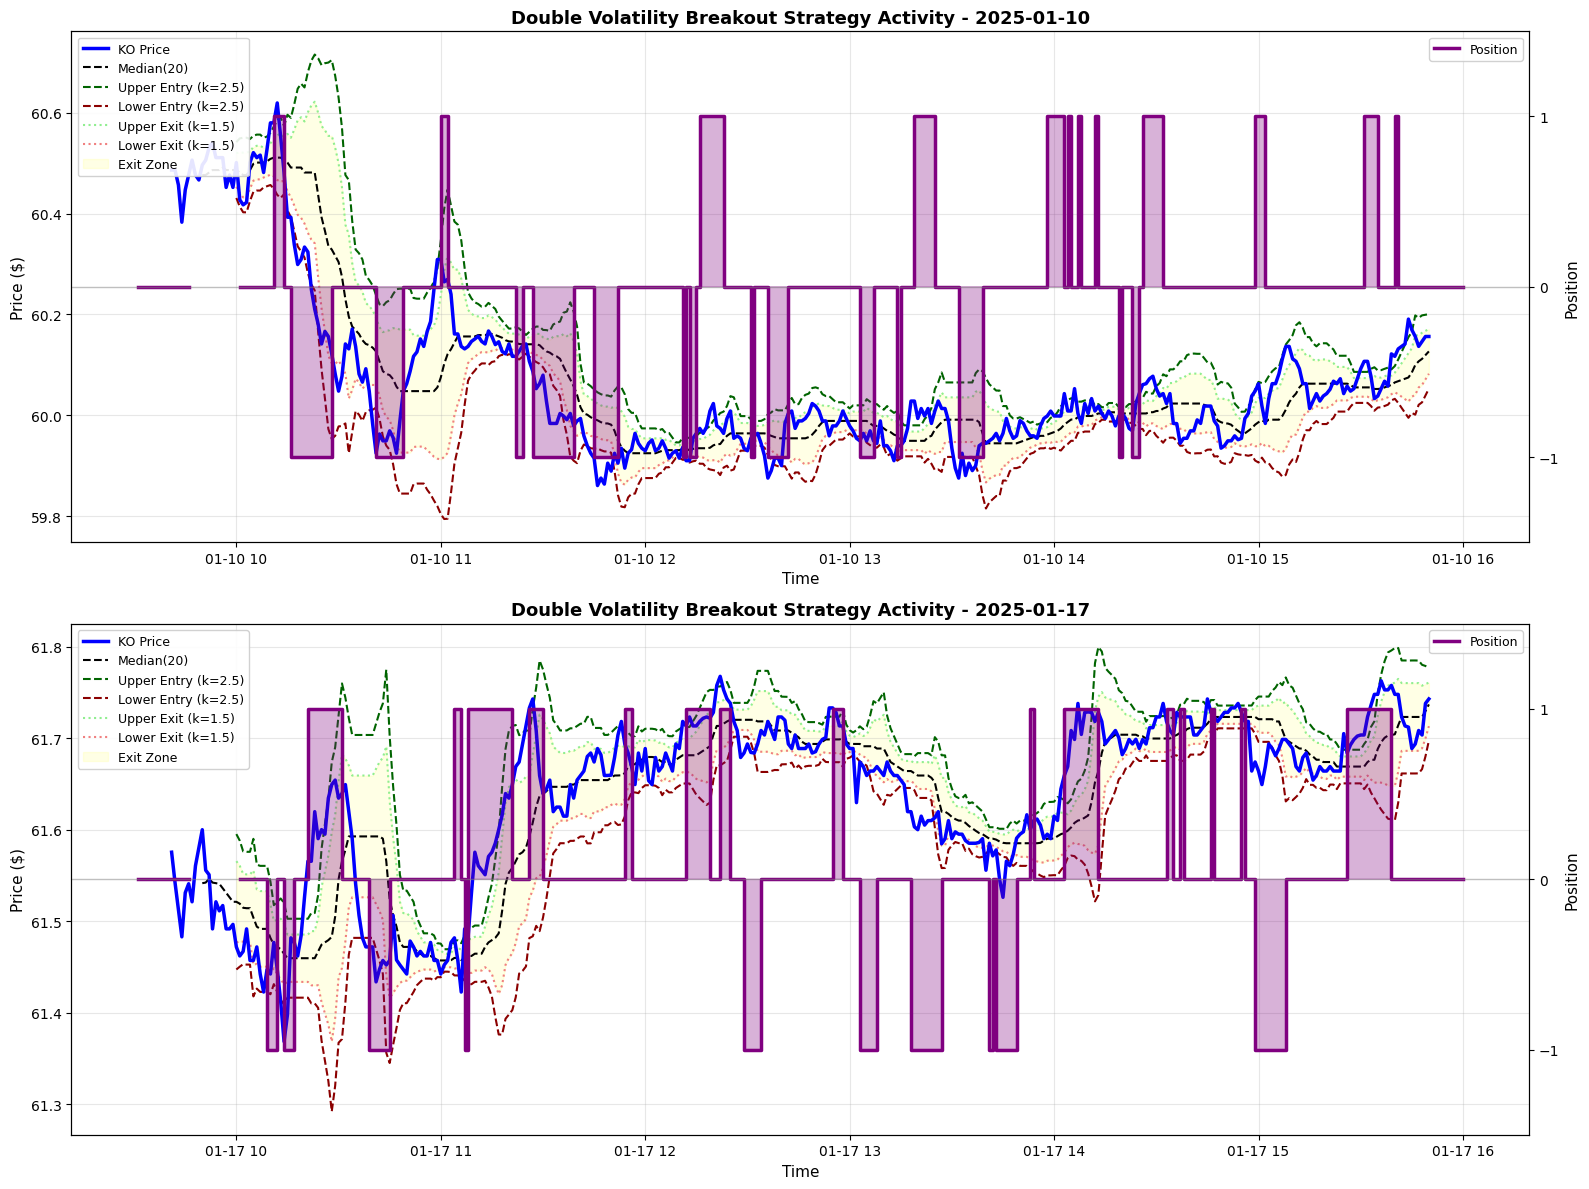

In [30]:
# 1. Define parameters for double volatility breakout
k_entry = 2.5  # Entry threshold (wider bands)
k_exit = 1.5   # Exit threshold (narrower bands)

# 2. Calculate entry and exit bands
# Entry bands (wider - harder to trigger)
dataUSA_KO_PEP['upper_entry'] = (dataUSA_KO_PEP['close_KO_Median20'] + 
                                  k_entry * dataUSA_KO_PEP['close_KO_MedAD20'])
dataUSA_KO_PEP['lower_entry'] = (dataUSA_KO_PEP['close_KO_Median20'] - 
                                  k_entry * dataUSA_KO_PEP['close_KO_MedAD20'])

# Exit bands (narrower - easier to trigger)
dataUSA_KO_PEP['upper_exit'] = (dataUSA_KO_PEP['close_KO_Median20'] + 
                                 k_exit * dataUSA_KO_PEP['close_KO_MedAD20'])
dataUSA_KO_PEP['lower_exit'] = (dataUSA_KO_PEP['close_KO_Median20'] - 
                                 k_exit * dataUSA_KO_PEP['close_KO_MedAD20'])

# 3. Calculate position using double threshold logic
# Initialize position column
dataUSA_KO_PEP['position_dvb'] = np.nan

# Get lagged values
lag_price = dataUSA_KO_PEP['close_KO'].shift(1)
lag_upper_entry = dataUSA_KO_PEP['upper_entry'].shift(1)
lag_lower_entry = dataUSA_KO_PEP['lower_entry'].shift(1)
lag_upper_exit = dataUSA_KO_PEP['upper_exit'].shift(1)
lag_lower_exit = dataUSA_KO_PEP['lower_exit'].shift(1)

# Check for non-missing values
all_nonmiss = (lag_price.notna() & 
               lag_upper_entry.notna() & 
               lag_lower_entry.notna() &
               lag_upper_exit.notna() & 
               lag_lower_exit.notna())

# Initialize the first valid position
first_valid_idx = all_nonmiss.idxmax()
if lag_price.loc[first_valid_idx] > lag_upper_entry.loc[first_valid_idx]:
    dataUSA_KO_PEP.loc[first_valid_idx, 'position_dvb'] = 1
elif lag_price.loc[first_valid_idx] < lag_lower_entry.loc[first_valid_idx]:
    dataUSA_KO_PEP.loc[first_valid_idx, 'position_dvb'] = -1
else:
    dataUSA_KO_PEP.loc[first_valid_idx, 'position_dvb'] = 0

# Calculate positions for all subsequent rows
for i in range(1, len(dataUSA_KO_PEP)):
    if not all_nonmiss.iloc[i]:
        continue
    
    # Get previous position
    prev_position = dataUSA_KO_PEP['position_dvb'].iloc[i-1]
    
    # Get current lagged price and bands
    curr_price = lag_price.iloc[i]
    curr_upper_entry = lag_upper_entry.iloc[i]
    curr_lower_entry = lag_lower_entry.iloc[i]
    curr_upper_exit = lag_upper_exit.iloc[i]
    curr_lower_exit = lag_lower_exit.iloc[i]
    
    # Position logic based on previous position
    if prev_position == 1:  # Currently long
        # Exit long if price falls below upper_exit
        if curr_price < curr_upper_exit:
            # Check if we should go short
            if curr_price < curr_lower_entry:
                dataUSA_KO_PEP.iloc[i, dataUSA_KO_PEP.columns.get_loc('position_dvb')] = -1
            else:
                dataUSA_KO_PEP.iloc[i, dataUSA_KO_PEP.columns.get_loc('position_dvb')] = 0
        else:
            # Stay long
            dataUSA_KO_PEP.iloc[i, dataUSA_KO_PEP.columns.get_loc('position_dvb')] = 1
            
    elif prev_position == -1:  # Currently short
        # Exit short if price rises above lower_exit
        if curr_price > curr_lower_exit:
            # Check if we should go long
            if curr_price > curr_upper_entry:
                dataUSA_KO_PEP.iloc[i, dataUSA_KO_PEP.columns.get_loc('position_dvb')] = 1
            else:
                dataUSA_KO_PEP.iloc[i, dataUSA_KO_PEP.columns.get_loc('position_dvb')] = 0
        else:
            # Stay short
            dataUSA_KO_PEP.iloc[i, dataUSA_KO_PEP.columns.get_loc('position_dvb')] = -1
            
    else:  # prev_position == 0 (neutral)
        # Enter long if price breaks above upper_entry
        if curr_price > curr_upper_entry:
            dataUSA_KO_PEP.iloc[i, dataUSA_KO_PEP.columns.get_loc('position_dvb')] = 1
        # Enter short if price breaks below lower_entry
        elif curr_price < curr_lower_entry:
            dataUSA_KO_PEP.iloc[i, dataUSA_KO_PEP.columns.get_loc('position_dvb')] = -1
        else:
            # Stay neutral
            dataUSA_KO_PEP.iloc[i, dataUSA_KO_PEP.columns.get_loc('position_dvb')] = 0

# 4. Set position to 0 during restricted trading hours
# First 15 minutes (09:30-09:45)
dataUSA_KO_PEP.loc[
    dataUSA_KO_PEP.between_time("09:30", "09:45").index,
    ['position_dvb']
] = 0

# Last 20 minutes (15:41-16:00)
dataUSA_KO_PEP.loc[
    dataUSA_KO_PEP.between_time("15:41", "16:00").index,
    ['position_dvb']
] = 0

# 5. Calculate Gross PNL
dataUSA_KO_PEP['pnl_gross_dvb'] = (
    dataUSA_KO_PEP['close_KO'].diff() * 
    dataUSA_KO_PEP['position_dvb']
)
dataUSA_KO_PEP['pnl_gross_dvb'] = dataUSA_KO_PEP['pnl_gross_dvb'].fillna(0)

# 6. Calculate number of transactions and Net PNL
dataUSA_KO_PEP['ntrans_dvb'] = dataUSA_KO_PEP['position_dvb'].diff().abs()
dataUSA_KO_PEP['pnl_net_dvb'] = (
    dataUSA_KO_PEP['pnl_gross_dvb'] -
    1.5 * dataUSA_KO_PEP['ntrans_dvb']
)

# 7. Calculate cumulative PNL
dataUSA_KO_PEP['cum_pnl_gross_dvb'] = dataUSA_KO_PEP['pnl_gross_dvb'].cumsum()
dataUSA_KO_PEP['cum_pnl_net_dvb'] = dataUSA_KO_PEP['pnl_net_dvb'].cumsum()

# 8. Plot cumulative PNL
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(dataUSA_KO_PEP.index, dataUSA_KO_PEP['cum_pnl_gross_dvb'], 
        label='Cumulative Gross PNL', color='blue', linewidth=2)
ax.plot(dataUSA_KO_PEP.index, dataUSA_KO_PEP['cum_pnl_net_dvb'], 
        label='Cumulative Net PNL', color='red', linewidth=2)
ax.axhline(y=0, color='black', linestyle='--', linewidth=0.5, alpha=0.5)
ax.set_title(f'Double Volatility Breakout Strategy - Cumulative PNL\n(Entry k={k_entry}, Exit k={k_exit})', 
             fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative PNL ($)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 9. Display strategy activity for two selected days
# Check available dates
print("Sample of available dates:")
unique_dates = pd.unique(dataUSA_KO_PEP.index.date)
print(unique_dates[:10])

# Select two dates (modify based on your data)
selected_dates = [str(unique_dates[5]), str(unique_dates[10])]  # Adjust indices as needed

for date in selected_dates:
    print(f"\n{'='*100}")
    print(f"Strategy Activity - {date}")
    print('='*100)
    
    # Filter data for the specific date
    day_data = dataUSA_KO_PEP.loc[date]
    
    # Display relevant columns
    display_cols = ['close_KO', 'close_KO_Median20', 'close_KO_MedAD20', 
                    'upper_entry', 'lower_entry', 'upper_exit', 'lower_exit',
                    'position_dvb', 'pnl_gross_dvb', 'ntrans_dvb', 'pnl_net_dvb']
    print(day_data[display_cols].head(20))  # Show first 20 rows
    
    # Daily summary
    print(f"\n{'-'*100}")
    print(f"Daily Summary for {date}:")
    print(f"Total Transactions: {day_data['ntrans_dvb'].sum():.0f}")
    print(f"Total Gross PNL: ${day_data['pnl_gross_dvb'].sum():.4f}")
    print(f"Total Net PNL: ${day_data['pnl_net_dvb'].sum():.4f}")
    print(f"Transaction Costs: ${(1.5 * day_data['ntrans_dvb'].sum()):.4f}")
    print(f"Position changes: {day_data['ntrans_dvb'].sum() / 2:.0f}")

# 10. Visualize strategy activity for the two selected days
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

for idx, date in enumerate(selected_dates):
    day_data = dataUSA_KO_PEP.loc[date]
    
    ax = axes[idx]
    ax2 = ax.twinx()
    
    # Plot price
    ax.plot(day_data.index, day_data['close_KO'], 
            label='KO Price', color='blue', linewidth=2.5, zorder=5)
    
    # Plot median
    ax.plot(day_data.index, day_data['close_KO_Median20'], 
            label='Median(20)', color='black', linewidth=1.5, linestyle='--', zorder=4)
    
    # Plot entry bands (wider, dashed)
    ax.plot(day_data.index, day_data['upper_entry'], 
            label=f'Upper Entry (k={k_entry})', color='darkgreen', 
            linewidth=1.5, linestyle='--', zorder=3)
    ax.plot(day_data.index, day_data['lower_entry'], 
            label=f'Lower Entry (k={k_entry})', color='darkred', 
            linewidth=1.5, linestyle='--', zorder=3)
    
    # Plot exit bands (narrower, dotted)
    ax.plot(day_data.index, day_data['upper_exit'], 
            label=f'Upper Exit (k={k_exit})', color='lightgreen', 
            linewidth=1.5, linestyle=':', zorder=2)
    ax.plot(day_data.index, day_data['lower_exit'], 
            label=f'Lower Exit (k={k_exit})', color='lightcoral', 
            linewidth=1.5, linestyle=':', zorder=2)
    
    # Fill between exit bands
    ax.fill_between(day_data.index, day_data['lower_exit'], day_data['upper_exit'], 
                     alpha=0.1, color='yellow', label='Exit Zone', zorder=1)
    
    # Plot position on secondary axis
    ax2.step(day_data.index, day_data['position_dvb'], 
             label='Position', color='purple', linewidth=2.5, where='post')
    ax2.axhline(y=0, color='gray', linestyle='-', linewidth=1, alpha=0.5)
    ax2.fill_between(day_data.index, 0, day_data['position_dvb'], 
                      step='post', alpha=0.3, color='purple')
    
    # Formatting
    ax.set_title(f'Double Volatility Breakout Strategy Activity - {date}', fontsize=13, fontweight='bold')
    ax.set_xlabel('Time', fontsize=11)
    ax.set_ylabel('Price ($)', fontsize=11)
    ax2.set_ylabel('Position', fontsize=11)
    ax.legend(loc='upper left', fontsize=9, framealpha=0.9)
    ax2.legend(loc='upper right', fontsize=9, framealpha=0.9)
    ax.grid(True, alpha=0.3)
    ax2.set_ylim(-1.5, 1.5)
    ax2.set_yticks([-1, 0, 1])

plt.tight_layout()
plt.show()

In [31]:
dataUSA_KO_PEP.to_parquet('dataUSA_KO_PEP_after_HW6.parquet')